# **Florida Bike Rentals Prediction**

-----------------------------
## **Context**
-----------------------------

Aura customer FloridaBikeRentals.com is unable to predict peaks and troughs in demand for their high-end bikes. 

-----------------------------
## **Objectives**
-----------------------------

They have approached Aura to customize a marketing tool to predict bike-sharing demand. To stabilize the demand, devise marketing strategies using the bike-sharing dataset.  Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall, holidays, and many other factors, build a model to predict the bike count required at each hour for the stable supply of rental bikes. 

-----------------------------
## **Dataset**
-----------------------------

- **Date :** Date in year-month-day format

- **Rented Bike Count :** Count of bikes rented at each hour

- **Hour :** Hour of the day 

- **Temperature :** Temperature in Celsius

- **Humidity :** Humidity in percentage 

- **Snowfall :** Snowfall in cm

- **Holiday :** Is it a holiday? Holiday/ No holiday

- **Windspeed :** Speed of the wind in meters per sec (m/s)

- **Visibility :** Visibility in meters

- **Dew Point Temperature :** Dew point temperature in Celcius

- **Solar Radiation :** Radiant energy from the sun measured in MJ/m2 (per meters squared)

- **Rainfall :** Rainfall in mm

- **Seasons :** Season of the year – Winter, Summer, Spring, and Autumn

- **Functional Day :** Bike rented during functional (Fun) and nonfunctional hours (NoFunc)



## **Importing the libraries and overview of the dataset**

In [1]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **1. Load the dataset**

In [2]:
# Loading both train and test datasets

rental_df = pd.read_csv('FloridaBikeRentals.csv')



In [3]:
# Checking the first 5 rows of the dataset
rental_df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### **Observations:**
- No observations

#### **Checking the info of the training data**

In [4]:
rental_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
rental_df.shape

(8760, 14)

In [7]:
rental_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#### **Observations:**

- The train dataset has **8760 observations and 14 columns**.
- We observe that some of the columns have data type **object**, which means they are strings or categorical variables.
- The remaining variables are all numerical in nature.

### **2. Check for null values in any columns and handle the missing values**

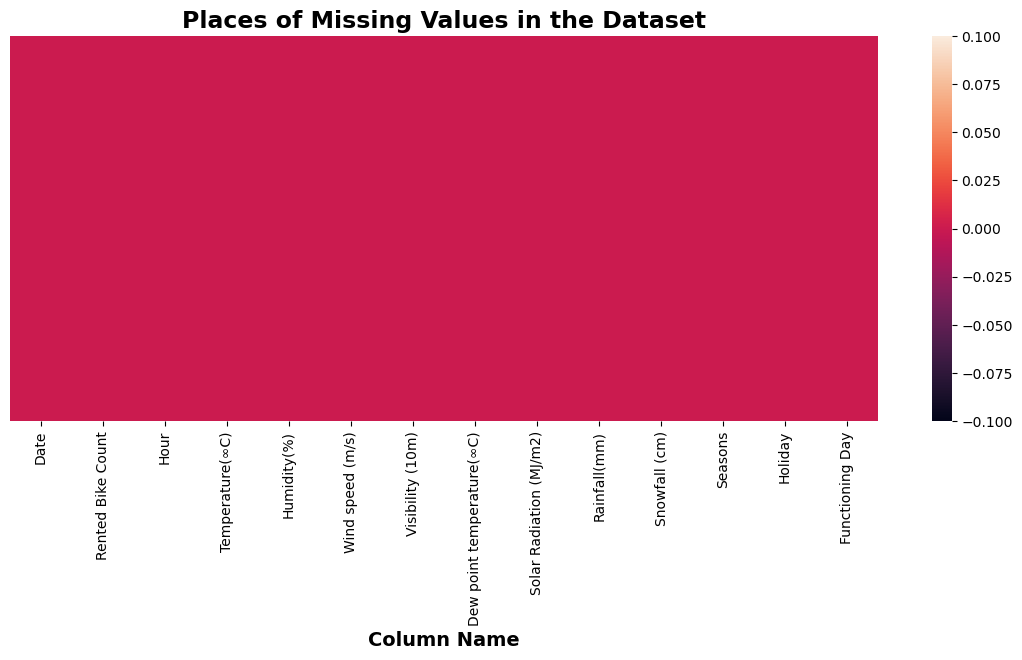

In [8]:
# Checking missing values
plt.figure(figsize=(14,5))
sns.heatmap(rental_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column Name", size=14, weight='bold')
plt.title("Places of Missing Values in the Dataset", size=17, fontweight='bold')
plt.show()

In [9]:
rental_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### **Observations**
 - There are no missing values in the dataset

### **3. Convert Date Columns to Date Format and extract day, month, and weekdays/weekend from date column**

In [10]:
rental_df['Date'] = pd.to_datetime(rental_df['Date'], format="%d/%m/%Y")


In [11]:
# Extracting day, month, day of week and weekdays/weekend from Date column

rental_df['Date'] = pd.to_datetime(rental_df['Date'])
rental_df['Month'] = rental_df['Date'].apply(lambda x: x.month)
rental_df['Day_of_Week'] = rental_df['Date'].dt.day_name()
rental_df['Weekdays_Weekend'] = rental_df['Day_of_Week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
rental_df = rental_df.drop(['Date', 'Day_of_Week'], axis=1)

In [12]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(∞C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(∞C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

### **4. Check correlation of features using a heatmap**

<Axes: >

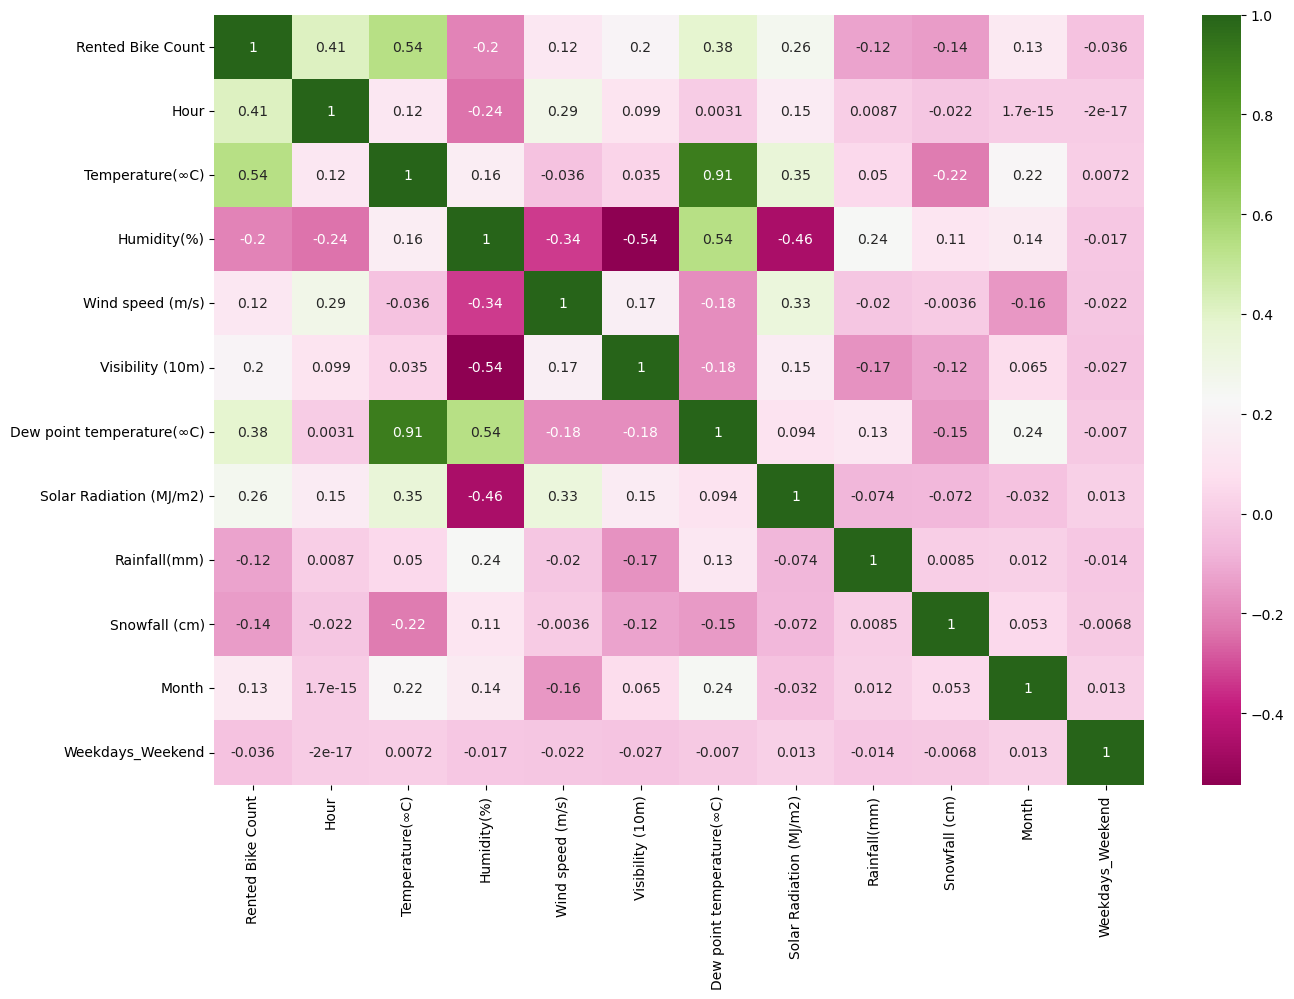

In [13]:
# Create new df with only numerical columns
rental_df_numerical = rental_df.select_dtypes(exclude=['object'])

# Checking the correlation of numerical columns
plt.figure(figsize=(15,10))
sns.heatmap(rental_df_numerical.corr(), annot=True, cmap='PiYG')


#### **Observations**
- The correlation heatmap shows the range of correlation between each of the variables/features.  The more darker the color the more they are correlated.

### **5. Plot The Distribution Plot of Rented Bike Count**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

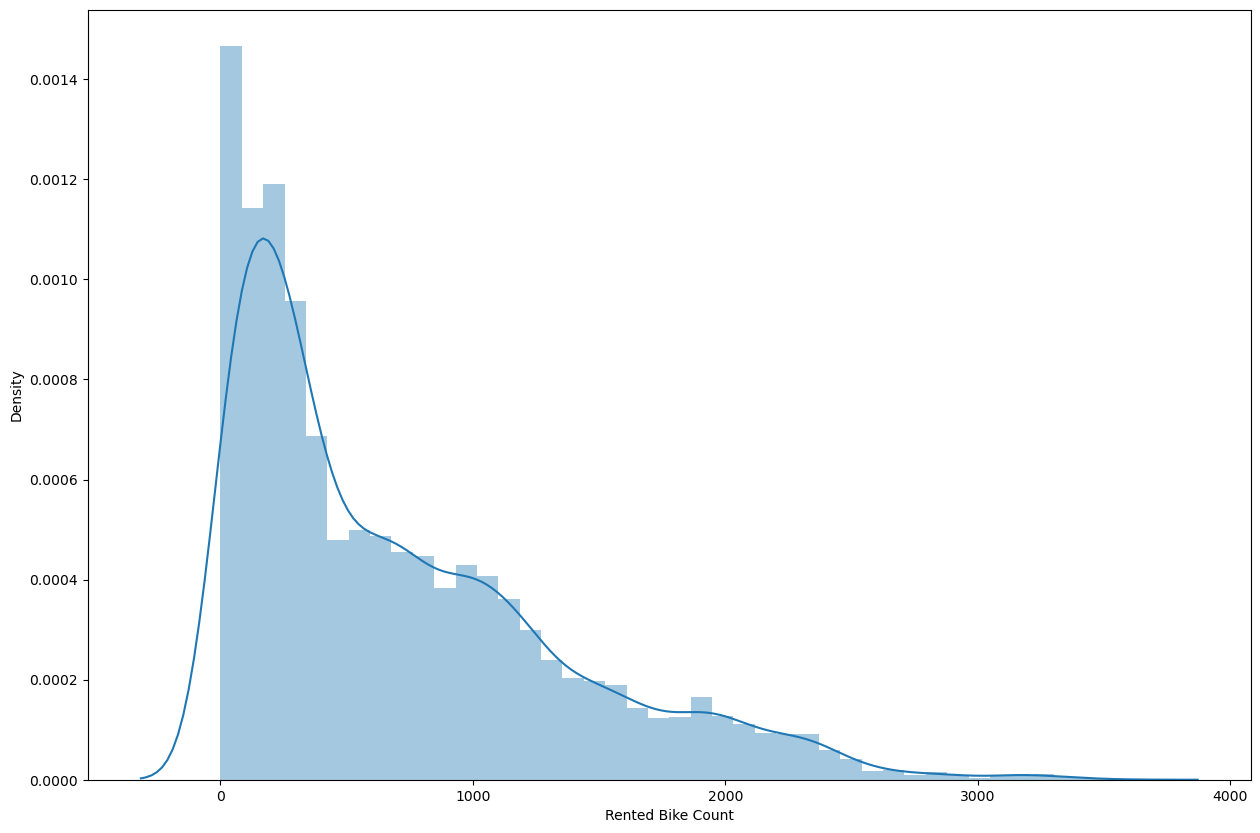

In [14]:
# Visualizing Distribution

plt.figure(figsize=(15,10))
sns.distplot(rental_df['Rented Bike Count'])

#### **Observations**
- The distribution plot shows that the density of the Rented Bike Count is at the peak around 350.

### **6. Plot the histogram of all numerical features**

In [15]:
# Numeric Features Information

rental_df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(∞C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(∞C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int64  
 11  Weekdays_Weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [16]:
# Describe the numeric features

rental_df_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


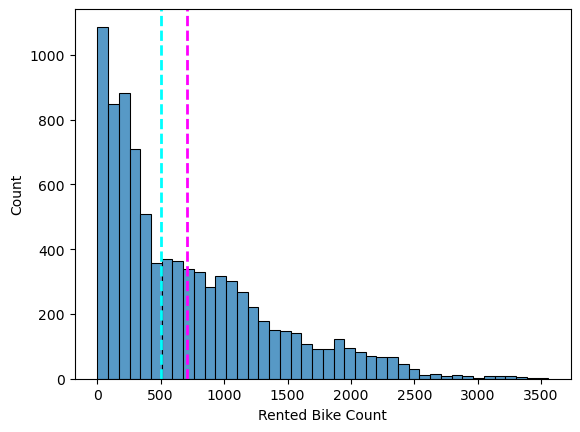

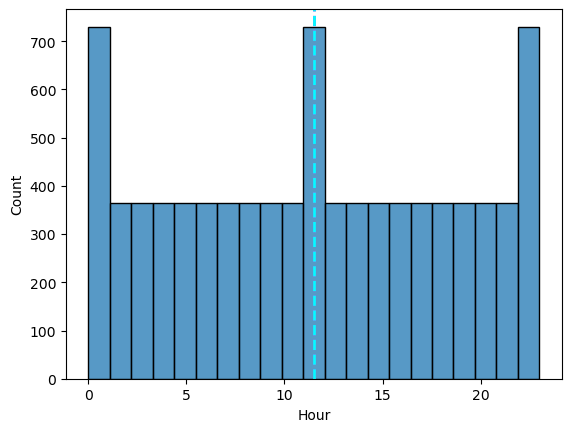

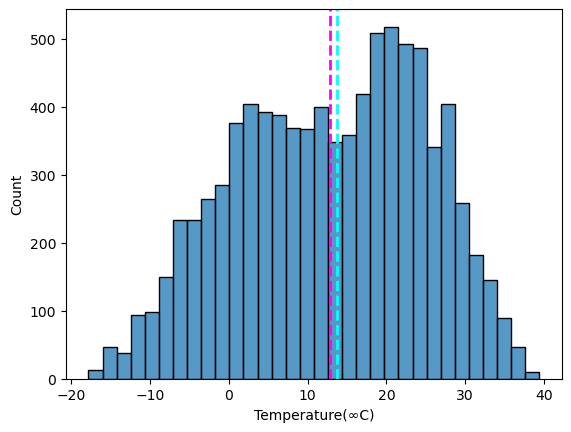

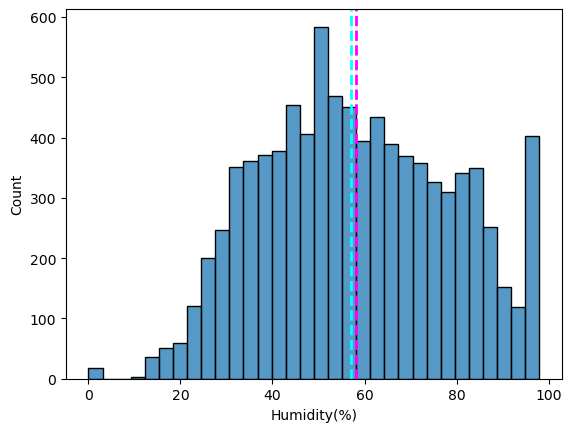

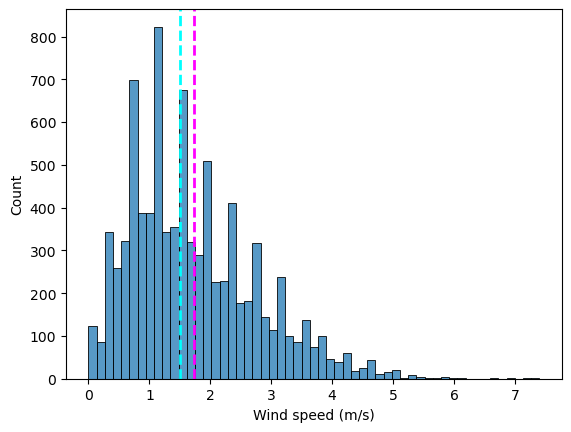

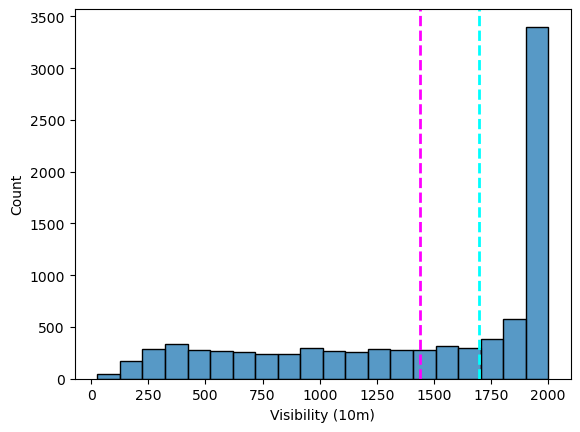

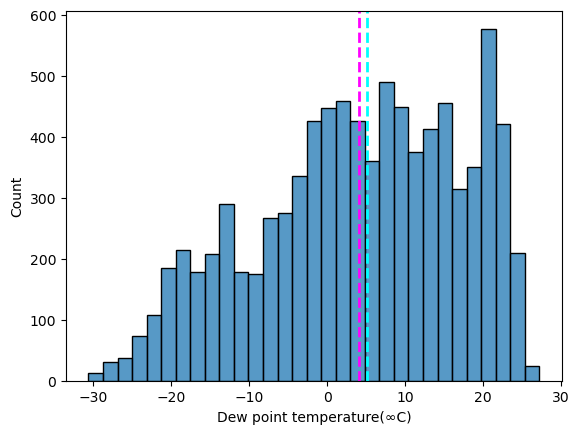

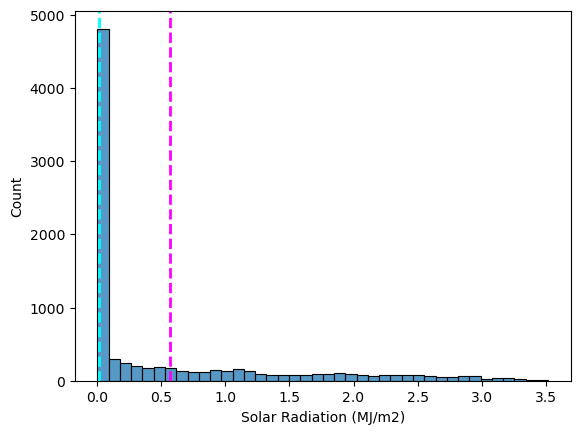

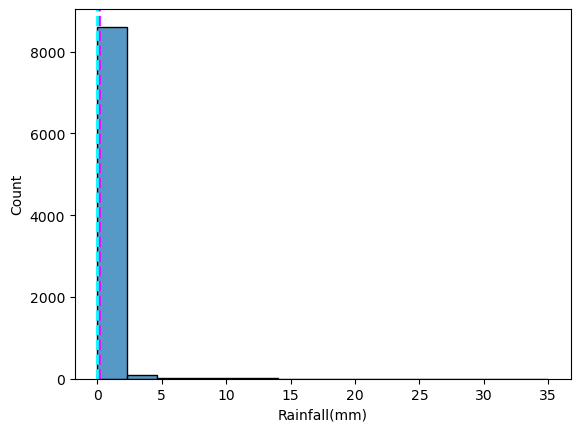

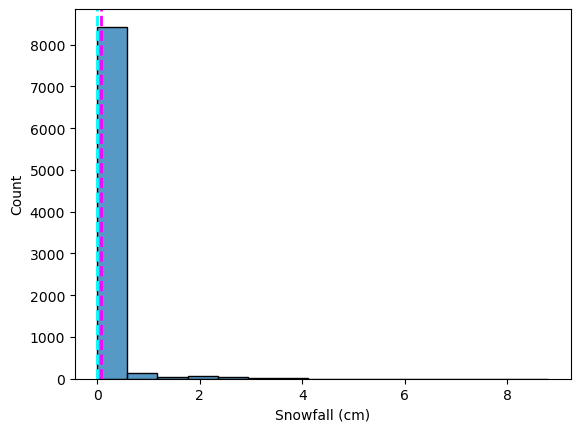

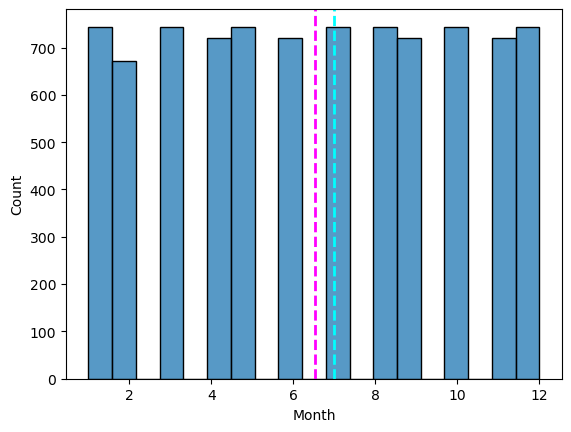

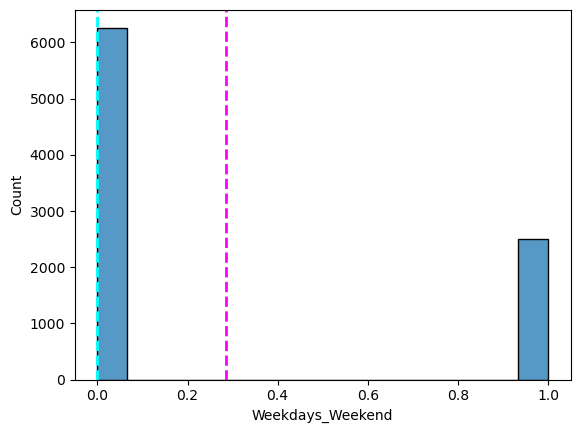

In [17]:
for col in rental_df_numerical[:]:
    sns.histplot(rental_df[col])
    plt.axvline(rental_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(rental_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.show()


#### **Observations**
- The histogram plots shows the distribution of each of the numerical variables across their bins
- Each graph shows when their count reach its peak. 

### **7. Plot the box plot of Rented Bike Count against all the categorical features**

In [18]:
# Extracting categorical features

categorical_features = rental_df.select_dtypes(include=['object'])

categorical_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [19]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


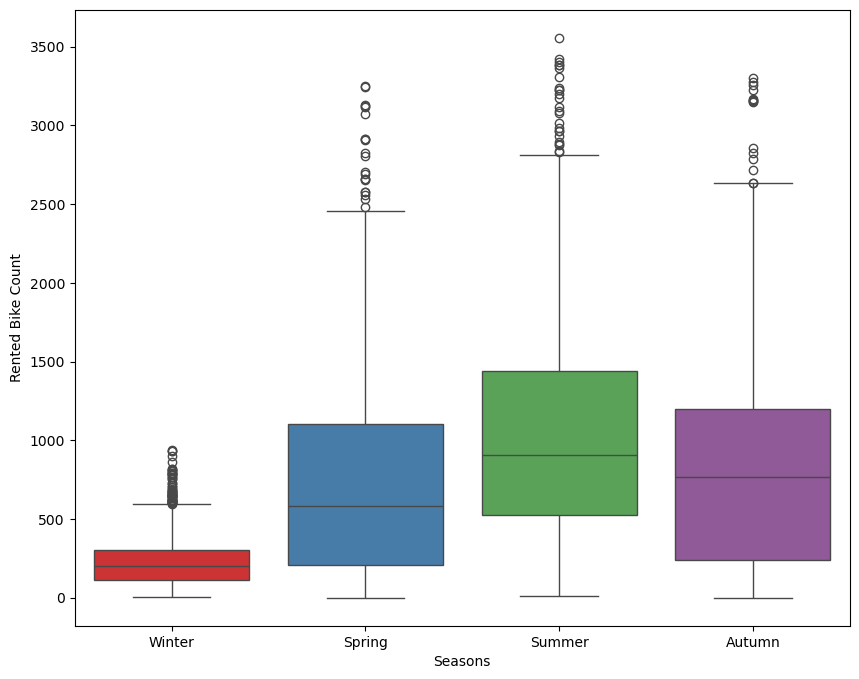

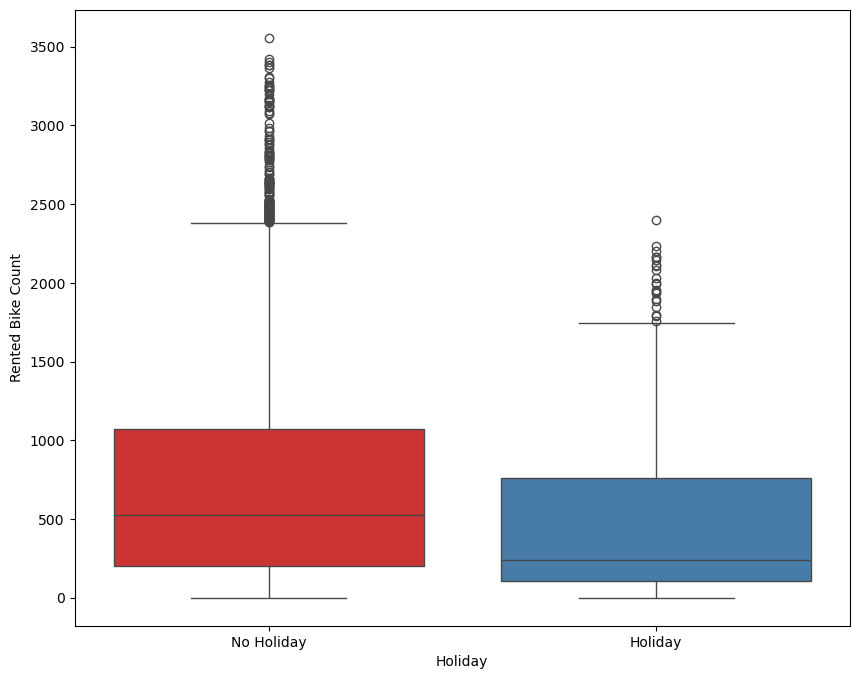

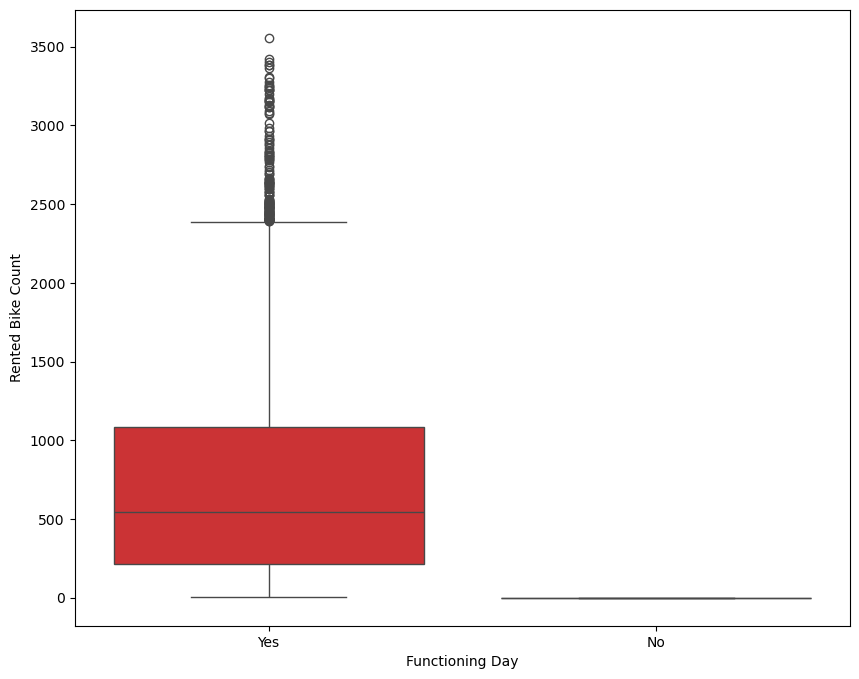

In [20]:
# Plotting Box Plot to visualize and trying to get information from plot

for col in categorical_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=col, y='Rented Bike Count', data=rental_df, palette='Set1')
    plt.show()

#### **Observations**
- Less demand in Winter Seasons
- Slightly Higher demand during Non-Holidays
- Almost no demand on Non-Functioning Day

In [21]:
# Checking Counts of Functioning Day

rental_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

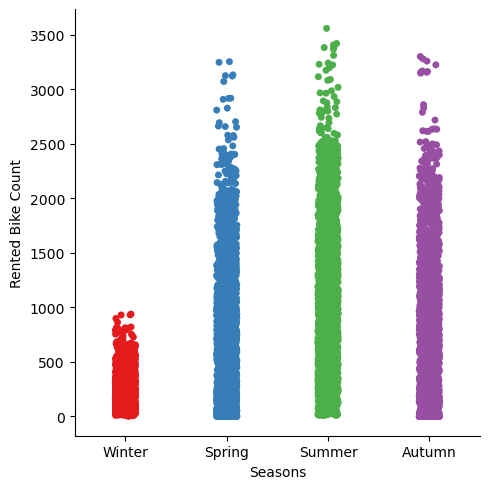

In [22]:
# Plotting Cat Plot for more information

sns.catplot(x='Seasons', y='Rented Bike Count', data=rental_df, palette='Set1')

#### **Observations**
- We can clearly see that there is less demand for rented bikes in the Winter Season

### 8. Plot the Seaborn Catplot fo Rented Bike Count against features like Hour, Holiday, Rainfall(mm), Snowfall(cm), Weekdays_Weekend and give your inferences

<Figure size 3000x5400 with 0 Axes>

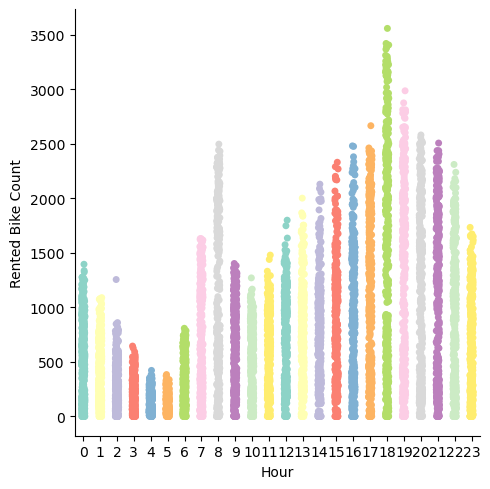

<Figure size 3000x5400 with 0 Axes>

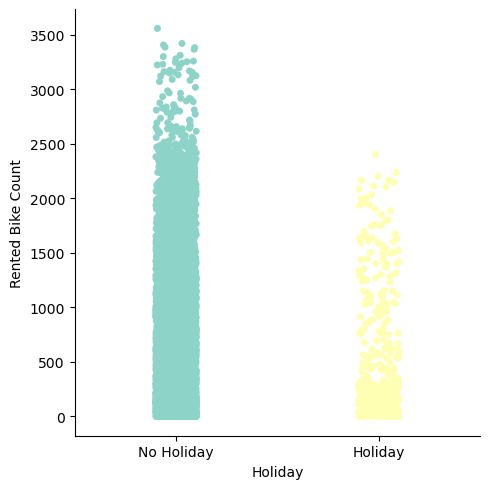

<Figure size 3000x5400 with 0 Axes>

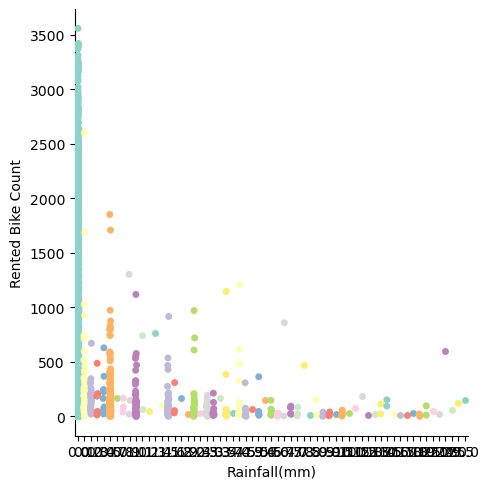

<Figure size 3000x5400 with 0 Axes>

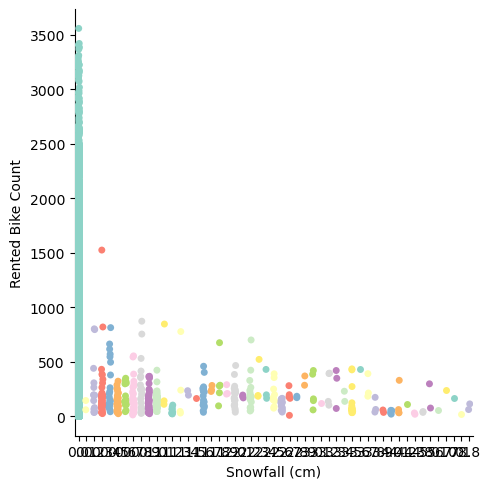

<Figure size 3000x5400 with 0 Axes>

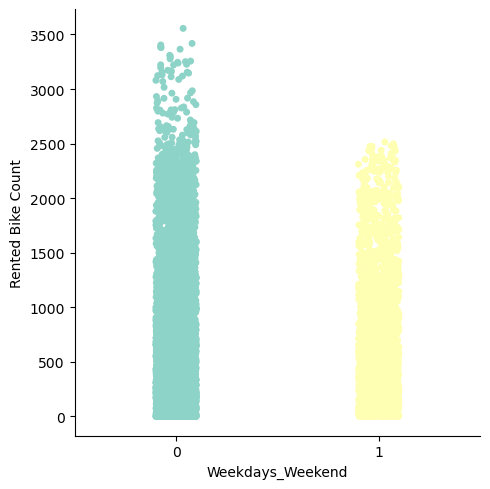

In [23]:
# Plotting Cat Plot on some features to get more information

feature_list=['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekdays_Weekend']

for feature in feature_list:
    plt.figure(figsize=(10,18), dpi=300)
    sns.catplot(x=feature, y='Rented Bike Count', data=rental_df, palette='Set3')
    plt.show()

#### **Observations**

_From Hour vs Rented Bikes_
- We can clearly see there is high demand for Rented Bikes between the Office Hours

_From Weekday-Weekends vs Rented Bikes_
- Weekdays has a comparatively high demand for rented bikes as compared to Weekend days

_From Rainfall vs Rented Bikes_
- We can see as rainfall increases demand for Rented Bikes decreases

_From Snowfall vs Rented Bikes_
- WE can see that as snowfall increases demand for Rented Bikes decreases

### **9. Encode The Categorical Features Into Numerical Features**

In [24]:
# Creating dummy variables for categorical features

dummy_categorical_features = pd.get_dummies(categorical_features, drop_first=True)

dummy_categorical_features.head()


,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True


In [25]:
# Concatenating the numeric columns and dummy columns and created final data frame

final_df = pd.concat([dummy_categorical_features, rental_df_numerical], axis=1)

# Showing the first 5 rows of the final data frame
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekdays_Weekend
0,False,False,True,True,True,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,False,False,True,True,True,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,False,False,True,True,True,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,False,False,True,True,True,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,False,False,True,True,True,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   bool   
 1   Seasons_Summer             8760 non-null   bool   
 2   Seasons_Winter             8760 non-null   bool   
 3   Holiday_No Holiday         8760 non-null   bool   
 4   Functioning Day_Yes        8760 non-null   bool   
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(∞C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(∞C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

In [27]:
# Describing the final data frame
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### **10. Identify the target variable and split the dataset into train and test with a ratio of 80:20 and random state of 12**

In [28]:
# Train - Splitting the data

X = final_df.drop('Rented Bike Count', axis=1)

In [29]:
X.shape

(8760, 16)

In [30]:
y=final_df['Rented Bike Count']

In [31]:

# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **11. Perform Standard Scaling of the training dataset**

In [32]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


### **12. Perform Linear Regression, Lasso Regression and Ridge Regression for predicting the bike count required at each hour and compare the results**

In [33]:
# Creating a list of matrix to store the evaluation matrix of all models

mse_list = []
rmse_list = []
r2_list = []
adj_r2_list = []

In [34]:
# Creating functions to run different models

# def run_model(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
#     mean_squared_error.append(mse)
#     root_mean_squared_error.append(rmse)
#     r2_list.append(r2)
#     adj_r2_list.append(adj_r2)
#     print("Mean Squared Error: ", mse)
#     print("Root Mean Squared Error: ", rmse)
#     print("R2 Score: ", r2)
#     print("Adjusted R2 Score: ", adj_r2)

mse_list = []
rmse_list = []
r2_list = []
adj_r2_list = []

def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    print('\n==========================Evaluation Matrix==========================')
    MSE = mean_squared_error(y_test, preds)
    print("MSE :" , MSE)
    RMSE = np.sqrt(MSE)
    print("RMSE :" , RMSE)
    r2 = r2_score(y_test, preds)
    print("R2 :" , r2)
    adj_r2 = 1 - (1-r2_score(y_test, preds))*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
    print("Adjusted R2 :" , adj_r2)
    
    train_class_preds = linear_model.predict(X_train)
    print('\n==========================Evaluation Matrix==========================')
    
    mse_list.append(MSE)
    rmse_list.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    
    # Plotting the graph
    print('\n================================================================Evaluation Graph================================================================\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(['ACTUAL','PREDICTED'], prop={'size': 20})
    plt.show()

#### **Linear Regression Model**

In [35]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()


==========================Evaluation Matrix==========================
MSE : 192508.14461031515
RMSE : 438.7575009162979
R2 : 0.537957799237277
Adjusted R2 : 0.5336968913339897

==========================Evaluation Matrix==========================

================================================================Evaluation Graph================================================================



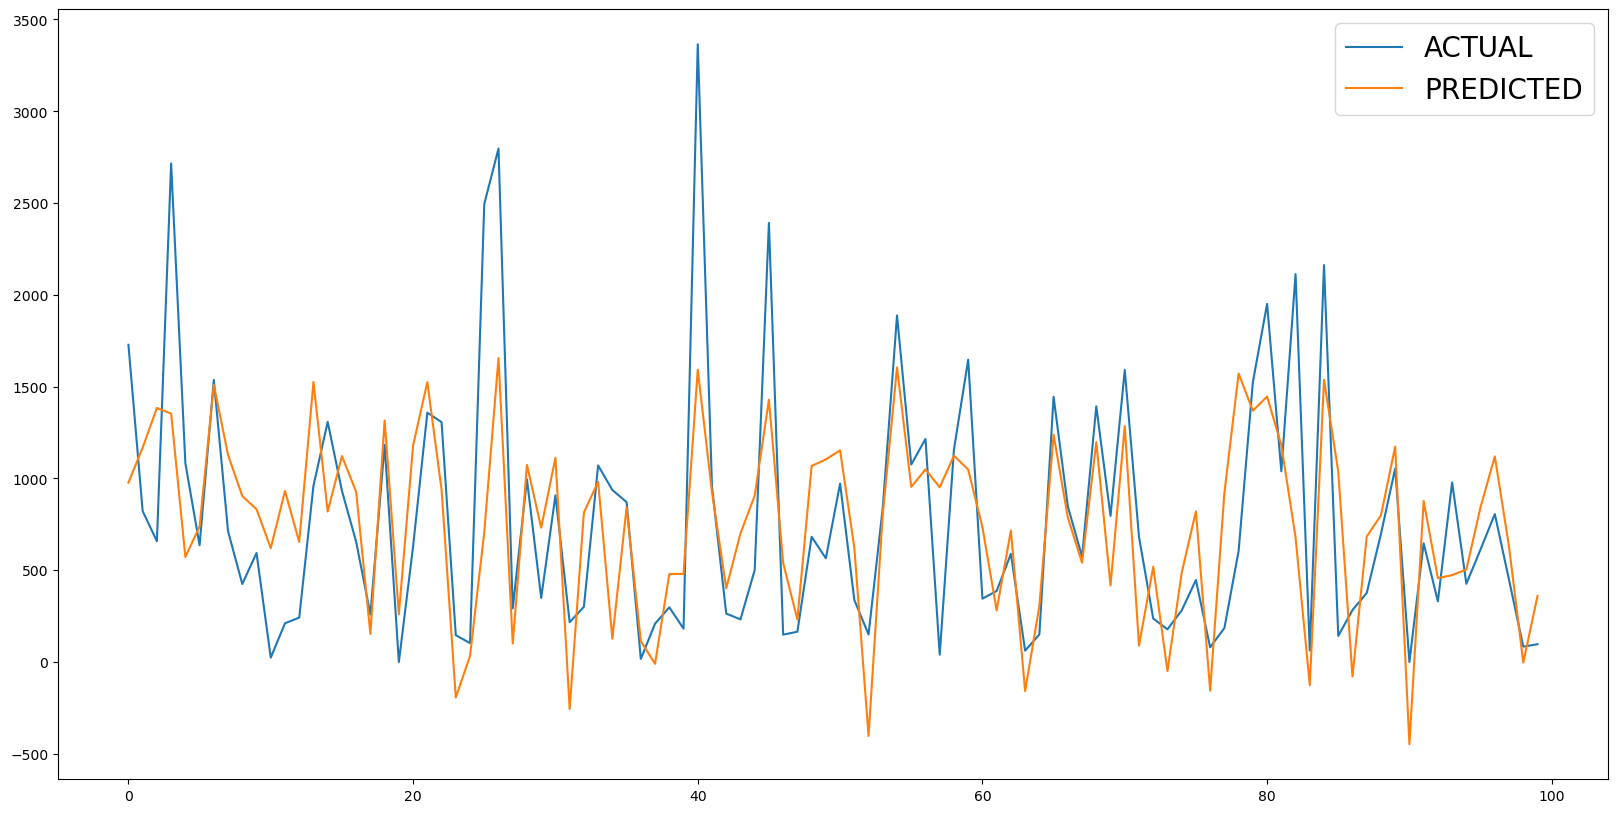

In [36]:
# Training the model

run_model(linear_model, X_train, y_train, X_test, y_test)

##### **Observations**
- The above plot shows how far the predicted values are away from actual values in case of Linear Regression

#### **Lasso Regression Model**

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Finding the best parameters for Lasso by GridSearchCV
lasso_model = Lasso()

parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100, 0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Parameters: ", lasso_grid.best_params_)

Best Parameters:  {'alpha': 0.1}



==========================Evaluation Matrix==========================
MSE : 192504.43187954245
RMSE : 438.75326993601135
R2 : 0.5379667102280329
Adjusted R2 : 0.5337058845010292

==========================Evaluation Matrix==========================

================================================================Evaluation Graph================================================================



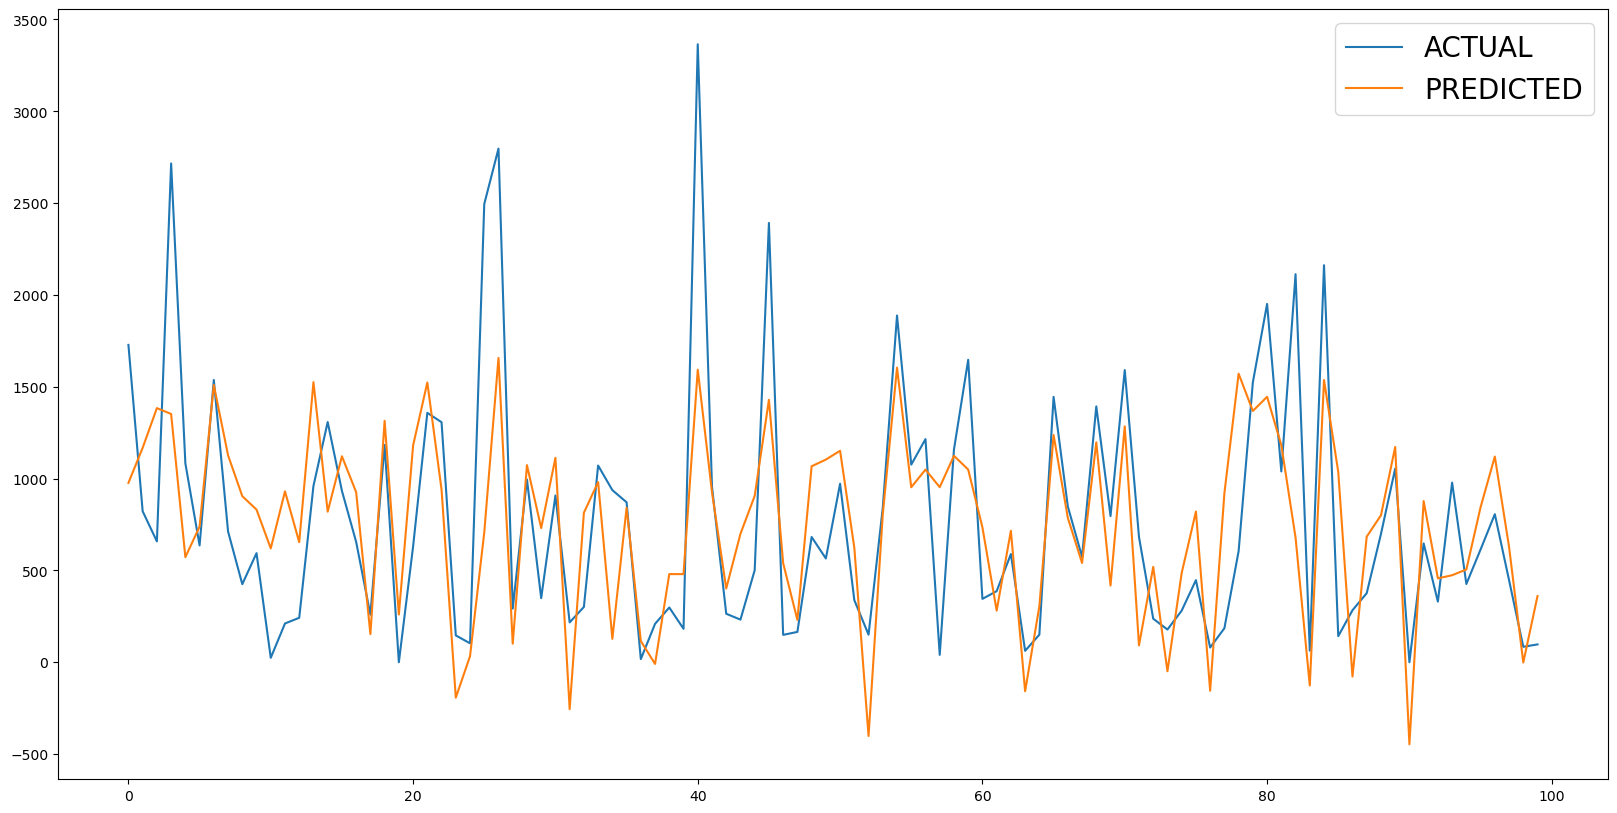

In [38]:
from sklearn.linear_model import Lasso

# Creating Lasso Model with best parameters
lasso_model = Lasso(alpha=0.1)

# Calling train_linear_model function to train, fit and evaluation of the Lasso Model
run_model(lasso_model, X_train, y_train, X_test, y_test)

##### **Observations**
- The above plot shows how far the predicted values are away from actual values in case of Lasso Regression

#### **Ridge Regression**

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Finding the best parameters for Ridge by GridSearchCV
ridge_model = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]}
ridge_grid = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_grid.fit(X_train, y_train)
print("Best Parameters: ", ridge_grid.best_params_)

Best Parameters:  {'alpha': 40}



==========================Evaluation Matrix==========================
MSE : 192505.83537983467
RMSE : 438.75486935170835
R2 : 0.5379633416621725
Adjusted R2 : 0.5337024848705845

==========================Evaluation Matrix==========================

================================================================Evaluation Graph================================================================



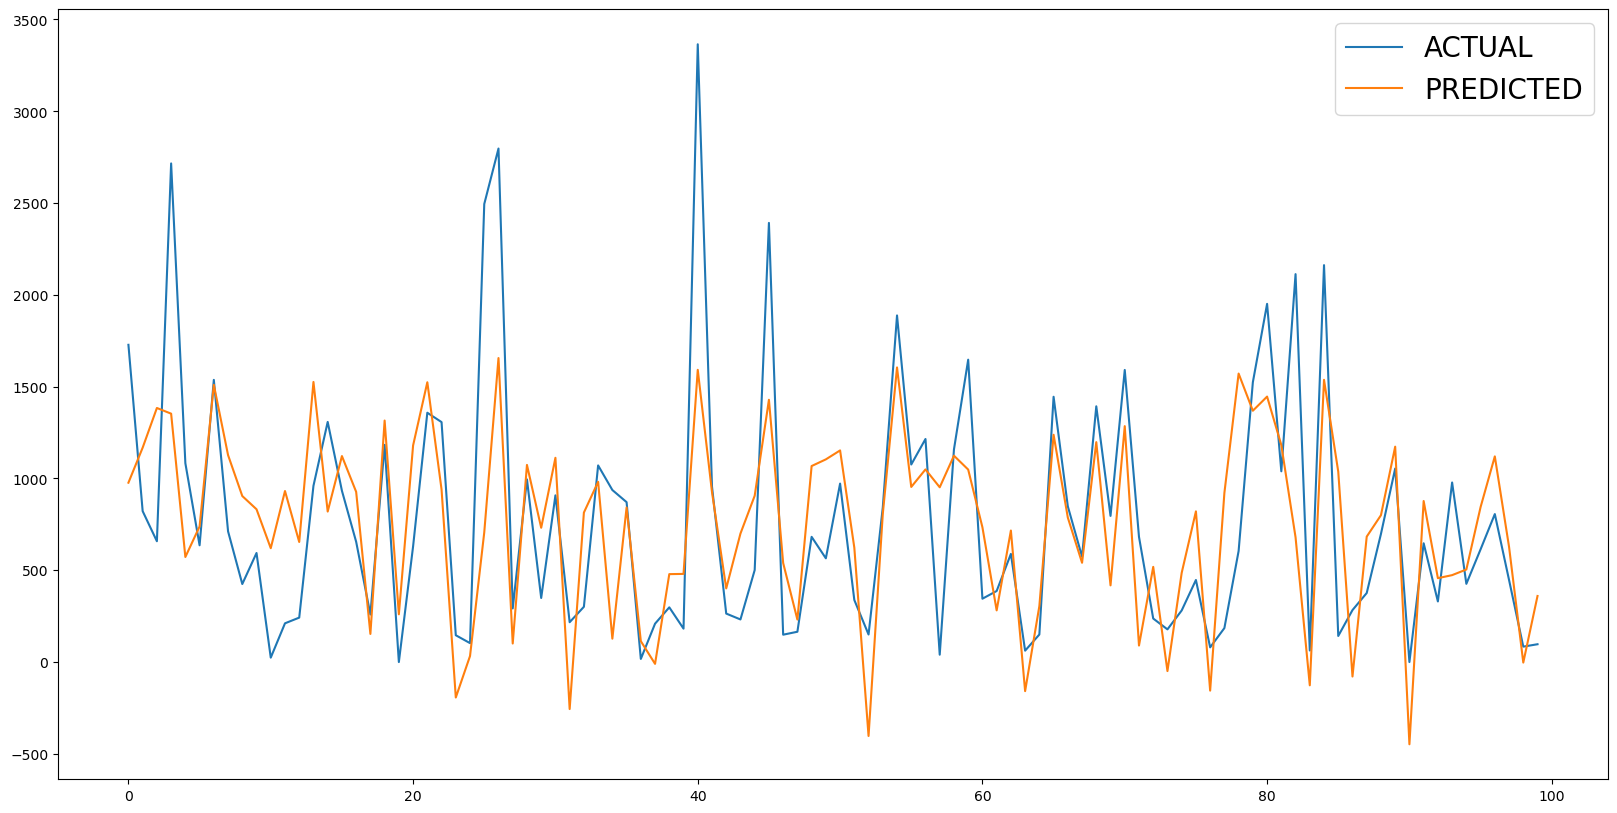

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)

run_model(ridge_model, X_train, y_train, X_test, y_test)

##### **Obervation**
- The above plot shows how far the predicted values are away from actual values in the case of Ridge Regression

#### **Combined Evaluation Matrix of All Models**

In [41]:
# Creating dictionary to store all the matrices
all_model_matrices={'Mean_square_error':mse_list, 'Root_Mean_square_error':rmse_list, 'R2':r2_list, 'Adjusted_R2':adj_r2_list}

# List of all models created
model_name=['Linear','Lasso','Ridge']

# Converting dictionary to dataframe for easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

matrices_df

,Linear,Lasso,Ridge
Mean_square_error,192508.144610,192504.431880,192505.835380
Root_Mean_square_error,438.757501,438.753270,438.754869
R2,0.537958,0.537967,0.537963
Adjusted_R2,0.533697,0.533706,0.533702


In [44]:
# Transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Model'})

final_matrices

,Model,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,192508.14461,438.757501,0.537958,0.533697
1,Lasso,192504.43188,438.753270,0.537967,0.533706
2,Ridge,192505.83538,438.754869,0.537963,0.533702


([0, 1, 2], [Text(0, 0, 'Linear'), Text(1, 0, 'Ridge'), Text(2, 0, 'Lasso')])

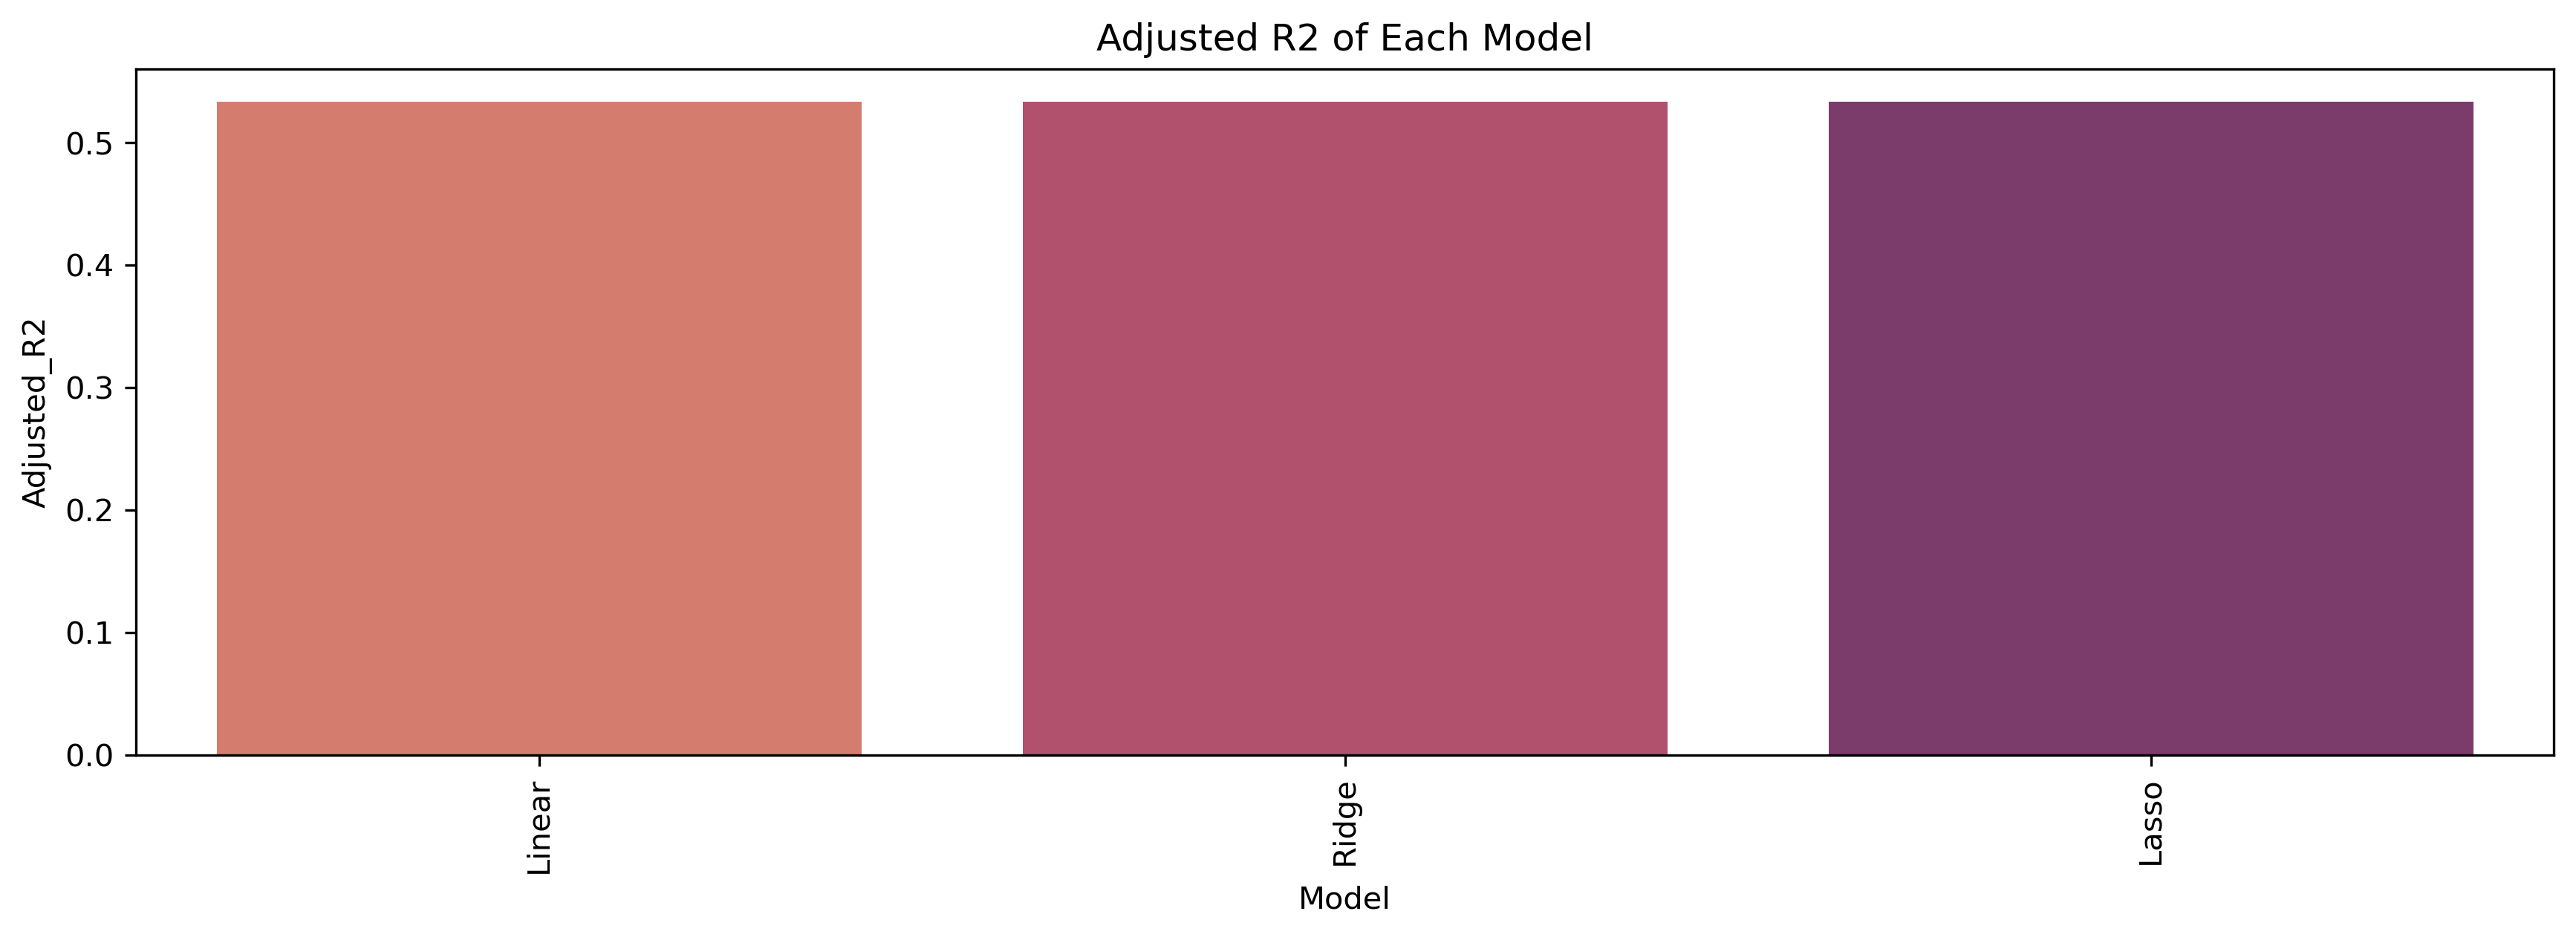

In [48]:
# Creating Bar Plot to Visualize the Adjusted R2 of Each Model
plt.figure(figsize=(14,4), dpi=300)
sns.barplot(x='Model', y='Adjusted_R2', data=final_matrices.sort_values('Adjusted_R2'), palette='flare').set(title='Adjusted R2 of Each Model')
plt.xticks(rotation=90)

##### **Observations**
1. On Holiday and Non-Working Days there is demand in rented bikes.
2. There is a surge of high demand in the morning at 8AM and in the evening at 6PM, this demand is potentially driven by people needing to rent bikes to go to work at 8AM in the morning and retuning from work at 6PM in the evening.
3. People preferred more rented bikes in the Morning rather than in the Evening.
4. When the rainfall was less, people have booked more bikes, with a few exceptions.
5. The Temperature, Hour and Humidity are the most important features that positively drive the total rented bikes count.
6. After performing the various models the Lasso and Ridge models were found to be slightly better models that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse, rmse) shows lower and (r2, adjusted_r2_ shows a higher values for the Lasso and Ridge models.
7. We can use either Lasso or Ridge model for the bike rental stations.
8. For further improvement int he performance, one would need to try out more complex models like RandomForest Regressor, GradientBoosting Regressor, LightGBM regressor, etc.